In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.model_selection import GridSearchCV


In [2]:
dataset = pd.read_csv(r'incident_gas_distribution_jan2010_present.csv')
dataset.head()

,REPORT_RECEIVED_DATE,IYEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_TYPE,OPERATOR_ID,NAME,OPERATOR_STREET_ADDRESS,OPERATOR_CITY_NAME,OPERATOR_STATE_ABBREVIATION,...,PREPARER_TELEPHONE,PREPARER_FAX,LOCAL_CONTACT_NAME,LOCAL_CONTACT_EMAIL,LOCAL_CONTACT_TELEPHONE,AUTHORIZER_NAME,AUTHORIZER_TITLE,AUTHORIZER_TELEPHONE,AUTHORIZER_EMAIL,NARRATIVE
0,11/17/21,2021,20210096,36009,ORIGINAL,22364,WEST BATON ROUGE PARISH NATURAL GAS SYSTEM,"880 N ALEXANDER, P.O. BOX 807",PORT ALLEN,LA,...,2253362406,2253875352,ADRIAN GENRE,adrian.genre@wbrcouncil.org,2253362406,ADRIAN GENRE,DIRECTOR OF UTILITIES,2253362406,adrian.genre@wbrcouncil.org,GAS CREW WAS INSTALLING A NEW 3/4 INCH PE SERV...
1,11/23/21,2021,20210098,36039,ORIGINAL FINAL,31232,AVISTA CORP,"1411 EAST MISSION (PO BOX 3727, 99220-3727)",SPOKANE,WA,...,509-495-2162,NaN,JOSH FORT,josh.fort@avistacorp.com,509-495-2656,VERN MALENSKY,MANAGER NATURAL GAS INTEGRITY AND COMPLIANCE,509-495-2706,vern.malensky@avistacorp.com,"AT APPROXIMATELY 10:00 A.M. PDT ON OCTOBER 28,..."
2,11/24/21,2021,20210099,36045,ORIGINAL FINAL,13710,NORTHERN ILLINOIS GAS CO,"P.O. BOX 190, RT 59 & I-88",AURORA,IL,...,NaN,NaN,NaN,NaN,NaN,LETICIA QUEZADA,DIRECTOR COMPLIANCE AND QA,6305142036,lquezad@southernco.com,"ON THE DATE OF THE INCIDENT, THERE WERE THUNDE..."
3,11/16/21,2021,20210095,36005,ORIGINAL FINAL,1720,"BRENHAM UTILITY, CITY OF",210 NORTH PARK STREET,BRENHAM,TX,...,19793377416,19793377419,ANDE BOSTAIN,abostain@cityofbrenham.org,19794511772,ANDE BOSTAIN,GAS SUPERINTINDENT,19794511772,abostain@cityofbrenham.org,THE EXCAVATOR WAS WORKING ON THE ACCESS ROAD F...
4,11/19/21,2021,20210097,36025,ORIGINAL,2392,CITIZENS GAS & COKE UTILITY,2020 NORTH MERIDAN ST,INDIANAPOLIS,IN,...,3176912514,NaN,NaN,NaN,NaN,BENJAMIN S. WARREN,DIRECTOR GAS TRANSMISSION AND DISTRIBUTION,3176912514,bwarren@citizensenergygroup.com,THE FINDINGS OF THE INVESTIGATION BY THE FIRE ...


In [3]:
dataset.columns

Index(['REPORT_RECEIVED_DATE', 'IYEAR', 'REPORT_NUMBER', 'SUPPLEMENTAL_NUMBER',
       'REPORT_TYPE', 'OPERATOR_ID', 'NAME', 'OPERATOR_STREET_ADDRESS',
       'OPERATOR_CITY_NAME', 'OPERATOR_STATE_ABBREVIATION',
       ...
       'PREPARER_TELEPHONE', 'PREPARER_FAX', 'LOCAL_CONTACT_NAME',
       'LOCAL_CONTACT_EMAIL', 'LOCAL_CONTACT_TELEPHONE', 'AUTHORIZER_NAME',
       'AUTHORIZER_TITLE', 'AUTHORIZER_TELEPHONE', 'AUTHORIZER_EMAIL',
       'NARRATIVE'],
      dtype='object', length=466)

In [4]:
X = dataset[['COMMODITY_RELEASED_TYPE', 'ACCIDENT_IDENTIFIER','FLOW_CONT_KEY_CRIT_IND', 'FLOW_CONT_MAIN_VALVE_IND','FLOW_CONT_SERVICE_VALVE_IND','FLOW_CONT_METER_REG_IND','FLOW_CONT_EXCESS_FLOW_IND','FLOW_CONT_SQUEEZE_OFF_IND','FLOW_CONT_STOPPLE_FITNG_IND','IGNITE_IND','EXPLODE_IND','FEDERAL','LOCATION_TYPE','INCIDENT_AREA_TYPE','CROSSING','PIPE_FACILITY_TYPE','MATERIAL_INVOLVED','RELEASE_TYPE','EMPLOYEE_DRUG_TEST_IND','CONTRACTOR_DRUG_TEST_IND','INTERNAL_EXTERNAL','NATURAL_FORCE_TYPE','OUTSIDE_FORCE_TYPE']]

In [5]:
Y = dataset[['FATAL','INJURE']]

In [6]:
cost=dataset[['EST_COST_OPER_PAID','EST_COST_PROP_DAMAGE','EST_COST_EMERGENCY','EST_COST_OTHER','EST_COST_OTHER_DETAILS','GAS_COST_IN_MCF','EST_COST_UNINTENTIONAL_RELEASE','EST_COST_INTENTIONAL_RELEASE']]

In [7]:
cost.replace(np.nan, 0)
Y['TOTAL_COST'] = dataset.sum(axis=1)

<ipython-input-7-d5acea85aef8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['TOTAL_COST'] = dataset.sum(axis=1)


In [8]:
Y

,FATAL,INJURE,TOTAL_COST
0,0,1,2.027514e+07
1,0,0,2.183608e+07
2,0,0,2.041319e+07
3,0,0,2.025445e+07
4,0,5,2.034061e+07
...,...,...,...
1280,0,0,2.112937e+07
1281,0,5,2.085353e+07
1282,0,0,2.039546e+07
1283,0,0,2.013727e+07


In [9]:
X

,COMMODITY_RELEASED_TYPE,ACCIDENT_IDENTIFIER,FLOW_CONT_KEY_CRIT_IND,FLOW_CONT_MAIN_VALVE_IND,FLOW_CONT_SERVICE_VALVE_IND,FLOW_CONT_METER_REG_IND,FLOW_CONT_EXCESS_FLOW_IND,FLOW_CONT_SQUEEZE_OFF_IND,FLOW_CONT_STOPPLE_FITNG_IND,IGNITE_IND,...,INCIDENT_AREA_TYPE,CROSSING,PIPE_FACILITY_TYPE,MATERIAL_INVOLVED,RELEASE_TYPE,EMPLOYEE_DRUG_TEST_IND,CONTRACTOR_DRUG_TEST_IND,INTERNAL_EXTERNAL,NATURAL_FORCE_TYPE,OUTSIDE_FORCE_TYPE
0,NATURAL GAS,"LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS",NaN,YES,NaN,NaN,NaN,NaN,NaN,YES,...,UNDERGROUND,NO,MUNICIPALLY OWNED,PLASTIC,LEAK,YES,NO,NaN,NaN,NaN
1,NATURAL GAS,"LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS",NaN,NaN,NaN,NaN,NaN,YES,NaN,YES,...,ABOVEGROUND,NO,INVESTOR OWNED,PLASTIC,MECHANICAL PUNCTURE,NO,NO,NaN,NaN,NaN
2,NATURAL GAS,NOTIFICATION FROM EMERGENCY RESPONDER,NaN,NaN,NaN,YES,NaN,NaN,NaN,YES,...,ABOVEGROUND,NO,INVESTOR OWNED,OTHER,OTHER,NO,NO,NaN,LIGHTNING,NaN
3,NATURAL GAS,"LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS",YES,NaN,NaN,NaN,NaN,YES,NaN,YES,...,UNDERGROUND,NO,MUNICIPALLY OWNED,PLASTIC,MECHANICAL PUNCTURE,NO,NO,NaN,NaN,NaN
4,NATURAL GAS,NOTIFICATION FROM EMERGENCY RESPONDER,NaN,YES,NaN,NaN,NaN,NaN,NaN,YES,...,UNDERGROUND,NO,MUNICIPALLY OWNED,PLASTIC,LEAK,NO,NO,NaN,NaN,OTHER OUTSIDE FORCE DAMAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280,NATURAL GAS,"LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS",NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,...,ABOVEGROUND,NO,PRIVATELY OWNED,STEEL,LEAK,YES,NO,NaN,NaN,NaN
1281,NATURAL GAS,"LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS",NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,...,UNDERGROUND,NO,PRIVATELY OWNED,STEEL,LEAK,NO,NO,NaN,NaN,NaN
1282,NATURAL GAS,NOTIFICATION FROM PUBLIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,...,UNDERGROUND,NO,PRIVATELY OWNED,OTHER,LEAK,NO,NO,NaN,NaN,OTHER OUTSIDE FORCE DAMAGE
1283,NATURAL GAS,NOTIFICATION FROM EMERGENCY RESPONDER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,...,UNDERGROUND,NO,PRIVATELY OWNED,STEEL,LEAK,NO,NO,NaN,"EARTH MOVEMENT, NOT DUE TO HEAVY RAINS/FLOODS",NaN


In [10]:
for column in X.columns:
  print(X[column].value_counts(), '-----', column)
  print('---------------------------------------------------------------------------------------------')

NATURAL GAS      1204
PROPANE GAS        12
OTHER GAS           3
SYNTHETIC GAS       1
Name: COMMODITY_RELEASED_TYPE, dtype: int64 ----- COMMODITY_RELEASED_TYPE
---------------------------------------------------------------------------------------------
NOTIFICATION FROM EMERGENCY RESPONDER                                                                 654
LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS                                                      210
NOTIFICATION FROM THIRD PARTY THAT CAUSED THE INCIDENT                                                194
NOTIFICATION FROM PUBLIC                                                                              136
OTHER                                                                                                  51
SCADA-BASED INFORMATION (SUCH AS ALARM(S), ALERT(S), EVENT(S), AND/OR VOLUME OR PACK CALCULATIONS)     27
GROUND PATROL BY OPERATOR OR ITS CONTRACTOR                                                            10
CO

In [11]:
X[['FLOW_CONT_SERVICE_VALVE_IND','FLOW_CONT_KEY_CRIT_IND','FLOW_CONT_MAIN_VALVE_IND','FLOW_CONT_METER_REG_IND','FLOW_CONT_EXCESS_FLOW_IND','FLOW_CONT_STOPPLE_FITNG_IND','EXPLODE_IND']]=X[['FLOW_CONT_SERVICE_VALVE_IND','FLOW_CONT_KEY_CRIT_IND','FLOW_CONT_MAIN_VALVE_IND','FLOW_CONT_METER_REG_IND','FLOW_CONT_EXCESS_FLOW_IND','FLOW_CONT_STOPPLE_FITNG_IND','EXPLODE_IND']].replace(np.nan,'NO')

/env/miniconda3/envs/datascience/lib/python3.9/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [12]:
X['COMMODITY_RELEASED_TYPE']=X['COMMODITY_RELEASED_TYPE'].replace(np.nan,'OTHER GAS')

<ipython-input-12-ea852640e31d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['COMMODITY_RELEASED_TYPE']=X['COMMODITY_RELEASED_TYPE'].replace(np.nan,'OTHER GAS')


In [13]:
X['FLOW_CONT_SQUEEZE_OFF_IND']=X['FLOW_CONT_SQUEEZE_OFF_IND'].replace(np.nan,'NO')

<ipython-input-13-73de15f13722>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['FLOW_CONT_SQUEEZE_OFF_IND']=X['FLOW_CONT_SQUEEZE_OFF_IND'].replace(np.nan,'NO')


In [14]:
X['INTERNAL_EXTERNAL']=X['INTERNAL_EXTERNAL'].replace(np.nan,'INTERNAL CORROSION')

<ipython-input-14-6f7f21525037>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['INTERNAL_EXTERNAL']=X['INTERNAL_EXTERNAL'].replace(np.nan,'INTERNAL CORROSION')


In [15]:
X['NATURAL_FORCE_TYPE']=X['NATURAL_FORCE_TYPE'].replace(np.nan,'OTHER NATURAL FORCE DAMAGE')

<ipython-input-15-34e1a36f204a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['NATURAL_FORCE_TYPE']=X['NATURAL_FORCE_TYPE'].replace(np.nan,'OTHER NATURAL FORCE DAMAGE')


In [16]:
X['OUTSIDE_FORCE_TYPE']=X['OUTSIDE_FORCE_TYPE'].replace(np.nan,'OTHER OUTSIDE FORCE DAMAGE')

<ipython-input-16-e67e473f13fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['OUTSIDE_FORCE_TYPE']=X['OUTSIDE_FORCE_TYPE'].replace(np.nan,'OTHER OUTSIDE FORCE DAMAGE')


In [17]:
X.isna().sum()

COMMODITY_RELEASED_TYPE        0
ACCIDENT_IDENTIFIER            0
FLOW_CONT_KEY_CRIT_IND         0
FLOW_CONT_MAIN_VALVE_IND       0
FLOW_CONT_SERVICE_VALVE_IND    0
FLOW_CONT_METER_REG_IND        0
FLOW_CONT_EXCESS_FLOW_IND      0
FLOW_CONT_SQUEEZE_OFF_IND      0
FLOW_CONT_STOPPLE_FITNG_IND    0
IGNITE_IND                     0
EXPLODE_IND                    0
FEDERAL                        0
LOCATION_TYPE                  0
INCIDENT_AREA_TYPE             0
CROSSING                       0
PIPE_FACILITY_TYPE             0
MATERIAL_INVOLVED              0
RELEASE_TYPE                   0
EMPLOYEE_DRUG_TEST_IND         0
CONTRACTOR_DRUG_TEST_IND       0
INTERNAL_EXTERNAL              0
NATURAL_FORCE_TYPE             0
OUTSIDE_FORCE_TYPE             0
dtype: int64

In [18]:
Y['INJURE'].value_counts()

0     1014
1      180
2       48
3       17
4       11
6        5
5        3
7        1
8        1
10       1
17       1
25       1
33       1
48       1
Name: INJURE, dtype: int64

In [19]:
X_transform =  pd.get_dummies(X, drop_first=True)
X_transform.shape

(1285, 55)

In [20]:
scaler = StandardScaler()
# scaler.fit(np.array(Y['TOTAL_COST']).reshape((-1,1)))
# Y['TOTAL_COST']= scaler.transform(np.array(Y['TOTAL_COST']).reshape((-1,1)))

Y['INJURE_BOOL'] = [0 if val== 0 else 1 for val in Y['INJURE']]
Y['FATAL_BOOL'] = [0 if val== 0 else 1 for val in Y['FATAL']]
Y=Y.drop(columns = ['FATAL', 'INJURE'], axis=1 )



<ipython-input-20-9be71db1b3d7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['INJURE_BOOL'] = [0 if val== 0 else 1 for val in Y['INJURE']]
<ipython-input-20-9be71db1b3d7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['FATAL_BOOL'] = [0 if val== 0 else 1 for val in Y['FATAL']]


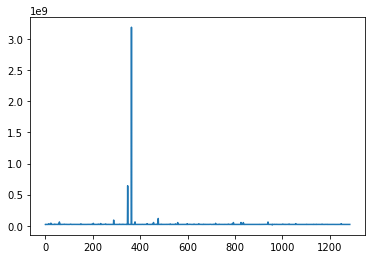

In [21]:
plt.plot(Y['TOTAL_COST'])


(array([1.18e+03, 9.00e+01, 1.10e+01, 1.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00]),
 array([16.33615514, 16.8909698 , 17.44578447, 18.00059914, 18.55541381,
        19.11022847, 19.66504314, 20.21985781, 20.77467248, 21.32948714,
        21.88430181]),
 <BarContainer object of 10 artists>)

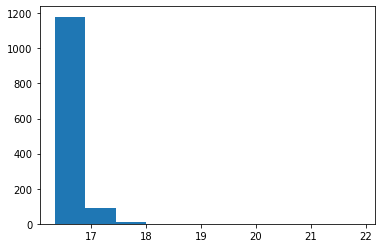

In [22]:
lig = np.log(Y['TOTAL_COST'])

# plt.plot(lig)
plt.hist(lig)

In [23]:
Y_cost_binary = lig>16.83
Y_cost_binary.value_counts()

True     666
False    619
Name: TOTAL_COST, dtype: int64

In [24]:
scaler.fit(np.array(Y['TOTAL_COST']).reshape(-1,1))
Y['TOTAL_COST']= Y_cost_binary
Y['TOTAL_COST'] = Y['TOTAL_COST'].map(lambda x: 1 if x==True else 0)

In [25]:
cost_threshold =  16.83
Y

,TOTAL_COST,INJURE_BOOL,FATAL_BOOL
0,0,1,0
1,1,0,0
2,1,0,0
3,0,0,0
4,0,1,0
...,...,...,...
1280,1,0,0
1281,1,1,0
1282,1,0,0
1283,0,0,0


In [26]:
y = pd.DataFrame(Y, columns=['TOTAL_COST','INJURE','FATAL'])

In [27]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import r2_score

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_transform,Y,train_size=0.7,random_state=123)

In [29]:
y_train

,TOTAL_COST,INJURE_BOOL,FATAL_BOOL
594,1,0,0
510,1,0,0
1106,1,1,0
176,0,0,0
620,0,0,0
...,...,...,...
1238,0,1,0
1147,0,0,0
106,1,0,0
1041,1,0,1


<AxesSubplot:xlabel='TOTAL_COST', ylabel='Count'>

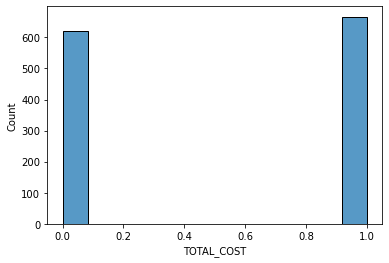

In [30]:
sns.histplot(y['TOTAL_COST'])

<AxesSubplot:xlabel='INJURE_BOOL', ylabel='Count'>

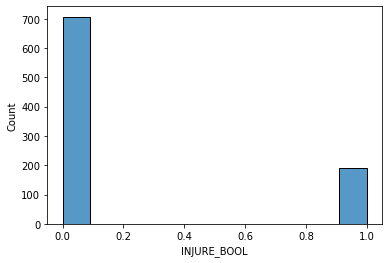

In [31]:
sns.histplot(y_train['INJURE_BOOL'])

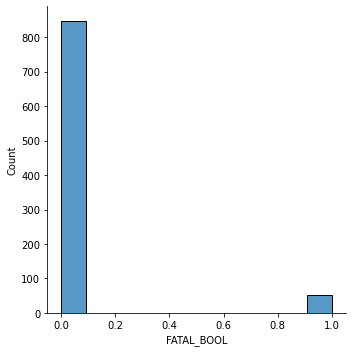

In [32]:
sns.displot(y_train['FATAL_BOOL'])

<AxesSubplot:>

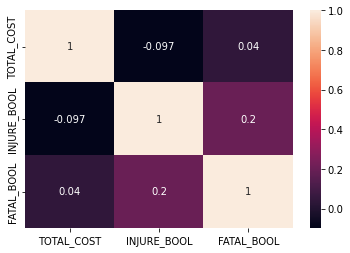

In [33]:
corr = Y.corr()
sns.heatmap(corr, annot = True)

In [34]:
plt.figure(figsize=(50,50))
corr = X_transform.corr()
sns.heatmap(corr, annot = True)


<AxesSubplot:>

Error in callback <function flush_figures at 0x7fb3af9374c0> (for post_execute):


KeyboardInterrupt: 

In [0]:
len(Y['TOTAL_COST'].value_counts()),len(Y['INJURE_BOOL'].value_counts()),len(Y['FATAL_BOOL'].value_counts()),len(Y)

### TOTAL COST PREDICTION

In [36]:
# Random Forest

max_depth=[2,4,8,16,32,64]
ntrees = [4,8,16,32]
max_features = [0.1,0.2,0.3,0.5,0.9]

weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=RandomForestClassifier(random_state = 123,class_weight='balanced'),
    param_grid={'max_depth':max_depth, 'n_estimators':ntrees,'max_features':max_features},
    scoring='f1',
    cv=5
)

oversample = SMOTE()
inp, out = oversample.fit_resample(X_train,y_train['TOTAL_COST'])

grid_result = gsc.fit(inp, out)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'max_depth': 2, 'max_features': 0.3, 'n_estimators': 4}


In [37]:
inp.shape, out.value_counts()

((918, 55),
 0    459
 1    459
 Name: TOTAL_COST, dtype: int64)

In [38]:
y_pred = grid_result.predict(X_test)
y_pred_rfCOST = y_pred
y_true = y_test['TOTAL_COST']

print(metrics.classification_report(y_true,y_pred))
print('Accuracy:',metrics.accuracy_score(y_true,y_pred))
print(metrics.confusion_matrix(y_true,y_pred))



              precision    recall  f1-score   support

           0       0.65      0.69      0.67       179
           1       0.71      0.68      0.69       207

    accuracy                           0.68       386
   macro avg       0.68      0.68      0.68       386
weighted avg       0.68      0.68      0.68       386

Accuracy: 0.6813471502590673
[[123  56]
 [ 67 140]]


In [39]:
#  Decision Tree
pram_dict = {'criterion' : ['gini','entropy'],
             'max_depth': [2,4,6,8,10],
             'min_samples_split' : [2,4,6,8,10],
             'min_samples_leaf' : range(1,5)}

weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state = 123,class_weight='balanced'),
    param_grid=pram_dict,
    scoring='f1',
    cv=5
)

oversample = SMOTE()

inp, out = oversample.fit_resample(X_train,y_train['TOTAL_COST'])

grid_result = gsc.fit(inp, out)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [40]:
y_pred = grid_result.predict(X_test)
y_pred_dtCOST = y_pred
y_true = y_test['TOTAL_COST']

print(metrics.classification_report(y_true,y_pred))
print('Accuracy:',metrics.accuracy_score(y_true,y_pred))
print(metrics.confusion_matrix(y_true,y_pred))



              precision    recall  f1-score   support

           0       0.66      0.68      0.67       179
           1       0.71      0.70      0.70       207

    accuracy                           0.69       386
   macro avg       0.69      0.69      0.69       386
weighted avg       0.69      0.69      0.69       386

Accuracy: 0.6865284974093264
[[121  58]
 [ 63 144]]


In [41]:
 # Gradient boost

pram_dict = {'learning_rate':[0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,500,1000,1500]}

weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state = 123),
    param_grid=pram_dict,
    scoring='f1',
    cv=5
)

oversample = SMOTE()
inp, out = oversample.fit_resample(X_train,y_train['TOTAL_COST'])

grid_result = gsc.fit(inp, out)
print("Best parameters : %s" % grid_result.best_params_)

KeyboardInterrupt: 

In [0]:
y_pred = grid_result.predict(X_test)
y_pred_gbCOST = y_pred
y_true = y_test['TOTAL_COST']

print(metrics.classification_report(y_true,y_pred))
print('Accuracy:',metrics.accuracy_score(y_true,y_pred))
print(metrics.confusion_matrix(y_true,y_pred))



# INJURIES PREDICTION

In [42]:
# Random Forest

max_depth=[8,16,32,64]
max_features = [0.3,0.5,0.9]

weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=RandomForestClassifier(random_state = 123,class_weight='balanced'),
    param_grid={'max_depth':max_depth, 'n_estimators':ntrees,'max_features':max_features},
    scoring='f1',
    cv=5
)



oversample = SMOTE()
inp, out = oversample.fit_resample(X_train,y_train['INJURE_BOOL'])

grid_result = gsc.fit(inp, out)
print("Best parameters : %s" % grid_result.best_params_)

KeyboardInterrupt: 

In [43]:
inp.shape, out.value_counts()

((1414, 55),
 0    707
 1    707
 Name: INJURE_BOOL, dtype: int64)

In [44]:
y_pred = grid_result.predict(X_test)
y_pred_rfINJ = y_pred
print(metrics.classification_report(y_test['INJURE_BOOL'],y_pred))
print('Accuracy:',metrics.accuracy_score(y_test['INJURE_BOOL'],y_pred))
print(metrics.confusion_matrix(y_test['INJURE_BOOL'],y_pred))




              precision    recall  f1-score   support

           0       0.88      0.53      0.66       307
           1       0.28      0.72      0.41        79

    accuracy                           0.57       386
   macro avg       0.58      0.62      0.53       386
weighted avg       0.76      0.57      0.61       386

Accuracy: 0.5673575129533679
[[162 145]
 [ 22  57]]


In [45]:
#  Decision Tree
pram_dict = {'criterion' : ['gini','entropy'],
             'max_depth': [2,4,6,8,10],
             'min_samples_split' : [2,4,6,8,10],
             'min_samples_leaf' : range(1,5)}

weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state = 123,class_weight='balanced'),
    param_grid=pram_dict,
    scoring='f1',
    cv=5
)

oversample = SMOTE()

inp, out = oversample.fit_resample(X_train,y_train['INJURE_BOOL'])

grid_result = gsc.fit(inp, out)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 6}


In [46]:
y_pred = grid_result.predict(X_test)
y_pred_dtINJ = y_pred
print(metrics.classification_report(y_test['INJURE_BOOL'],y_pred))
print('Accuracy:',metrics.accuracy_score(y_test['INJURE_BOOL'],y_pred))
print(metrics.confusion_matrix(y_test['INJURE_BOOL'],y_pred))




              precision    recall  f1-score   support

           0       0.86      0.80      0.83       307
           1       0.38      0.48      0.42        79

    accuracy                           0.73       386
   macro avg       0.62      0.64      0.63       386
weighted avg       0.76      0.73      0.74       386

Accuracy: 0.7331606217616581
[[245  62]
 [ 41  38]]


In [47]:
# Gradient boost

pram_dict = {'learning_rate':[0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,500,1000,1500]}

weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state = 123),
    param_grid=pram_dict,
    scoring='f1',
    cv=5
)

oversample = SMOTE()
inp, out = oversample.fit_resample(X_train,y_train['INJURE_BOOL'])

grid_result = gsc.fit(inp, out)
print("Best parameters : %s" % grid_result.best_params_)

KeyboardInterrupt: 

In [0]:
y_pred = grid_result.predict(X_test)
y_pred_gbINJ = y_pred
print(metrics.classification_report(y_test['INJURE_BOOL'],y_pred))
print('Accuracy:',metrics.accuracy_score(y_test['INJURE_BOOL'],y_pred))
print(metrics.confusion_matrix(y_test['INJURE_BOOL'],y_pred))





# FATALITIES PREDICTION

In [0]:
# Random Forest

max_depth=[2,4,8,16,32,64]
ntrees = [4,8,16,32]
max_features = [0.1,0.2,0.3,0.5,0.9]

weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=RandomForestClassifier(random_state = 123,class_weight='balanced'),
    param_grid={'max_depth':max_depth, 'n_estimators':ntrees,'max_features':max_features},
    scoring='f1',
    cv=5
)



oversample = SMOTE()
inp, out = oversample.fit_resample(X_train,y_train['FATAL_BOOL'])

grid_result = gsc.fit(inp, out)
print("Best parameters : %s" % grid_result.best_params_)

In [0]:
y_pred = grid_result.predict(X_test)
y_pred_rfFAT = y_pred
print(metrics.classification_report(y_test['FATAL_BOOL'],y_pred))
print('Accuracy:',metrics.accuracy_score(y_test['FATAL_BOOL'],y_pred))
print(metrics.confusion_matrix(y_test['FATAL_BOOL'],y_pred))




In [0]:
#  Decision Tree
pram_dict = {'criterion' : ['gini','entropy'],
             'max_depth': [2,4,6,8,10],
             'min_samples_split' : [2,4,6,8,10],
             'min_samples_leaf' : range(1,5)}

weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state = 123,class_weight='balanced'),
    param_grid=pram_dict,
    scoring='f1',
    cv=5
)

oversample = SMOTE()

inp, out = oversample.fit_resample(X_train,y_train['FATAL_BOOL'])

grid_result = gsc.fit(inp, out)
print("Best parameters : %s" % grid_result.best_params_)

In [0]:
y_pred = grid_result.predict(X_test)
y_pred_dtFAT = y_pred
print(metrics.classification_report(y_test['FATAL_BOOL'],y_pred))
print('Accuracy:',metrics.accuracy_score(y_test['FATAL_BOOL'],y_pred))
print(metrics.confusion_matrix(y_test['FATAL_BOOL'],y_pred))




In [0]:
# Gradient boost

pram_dict = {'learning_rate':[0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,500,1000,1500]}

weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state = 123),
    param_grid=pram_dict,
    scoring='f1',
    cv=5
)


oversample = SMOTE()
inp, out = oversample.fit_resample(X_train,y_train['FATAL_BOOL'])

grid_result = gsc.fit(inp, out)
print("Best parameters : %s" % grid_result.best_params_)

In [0]:
y_pred = grid_result.predict(X_test)
y_pred_gbFAT = y_pred
print(metrics.classification_report(y_test['FATAL_BOOL'],y_pred))
print('Accuracy:',metrics.accuracy_score(y_test['FATAL_BOOL'],y_pred))
print(metrics.confusion_matrix(y_test['FATAL_BOOL'],y_pred))





In [51]:
!pip3 install pgmpy

  Using cached pgmpy-0.1.18-py3-none-any.whl (1.9 MB)


     |                                | 30 kB 6.5 MB/s eta 0:01:55

     |                                | 788 kB 9.5 MB/s eta 0:01:19

     |                                | 1.6 MB 9.5 MB/s eta 0:01:19

     |                                | 2.4 MB 9.5 MB/s eta 0:01:19

     |▏                               | 3.2 MB 9.5 MB/s eta 0:01:19

     |▏                               | 4.1 MB 9.5 MB/s eta 0:01:19

     |▏                               | 4.9 MB 9.5 MB/s eta 0:01:19

     |▎                               | 5.7 MB 9.5 MB/s eta 0:01:19

     |▎                               | 6.5 MB 9.5 MB/s eta 0:01:19

     |▎                               | 7.3 MB 9.5 MB/s eta 0:01:19

     |▍                               | 8.1 MB 9.5 MB/s eta 0:01:19

     |▍                               | 8.9 MB 9.5 MB/s eta 0:01:18

     |▍                               | 9.7 MB 9.5 MB/s eta 0:01:18

     |▌                               | 10.6 MB 9.5 MB/s eta 0:01:18

     |▌                               | 11.4 MB 9.5 MB/s eta 0:01:18

     |▌                               | 12.2 MB 9.5 MB/s eta 0:01:18

     |▌                               | 13.0 MB 9.5 MB/s eta 0:01:18

     |▋                               | 13.8 MB 9.5 MB/s eta 0:01:18

     |▋                               | 14.6 MB 9.5 MB/s eta 0:01:18

     |▋                               | 15.4 MB 9.5 MB/s eta 0:01:18

     |▊                               | 16.3 MB 15.0 MB/s eta 0:00:50

     |▊                               | 17.0 MB 15.0 MB/s eta 0:00:50

     |▊                               | 17.9 MB 15.0 MB/s eta 0:00:49

     |▉                               | 18.7 MB 15.0 MB/s eta 0:00:49

     |▉                               | 19.5 MB 15.0 MB/s eta 0:00:49

     |▉                               | 20.3 MB 15.0 MB/s eta 0:00:49

     |█                               | 21.1 MB 15.0 MB/s eta 0:00:49

     |█                               | 21.9 MB 15.0 MB/s eta 0:00:49

     |█                               | 22.7 MB 15.0 MB/s eta 0:00:49

     |█                               | 23.5 MB 15.0 MB/s eta 0:00:49

     |█                               | 24.4 MB 15.0 MB/s eta 0:00:49

     |█                               | 25.2 MB 15.0 MB/s eta 0:00:49

     |█                               | 26.0 MB 15.0 MB/s eta 0:00:49

     |█▏                              | 26.8 MB 15.0 MB/s eta 0:00:49

     |█▏                              | 27.6 MB 15.0 MB/s eta 0:00:49

     |█▏                              | 28.4 MB 15.0 MB/s eta 0:00:49

     |█▎                              | 30.0 MB 15.0 MB/s eta 0:00:49

     |█▎                              | 30.8 MB 15.0 MB/s eta 0:00:49

     |█▍                              | 31.6 MB 15.0 MB/s eta 0:00:49

     |█▍                              | 32.5 MB 14.6 MB/s eta 0:00:50

     |█▍                              | 33.3 MB 14.6 MB/s eta 0:00:50

     |█▌                              | 34.9 MB 14.6 MB/s eta 0:00:49

     |█▌                              | 35.7 MB 14.6 MB/s eta 0:00:49

     |█▋                              | 36.5 MB 14.6 MB/s eta 0:00:49

     |█▋                              | 37.3 MB 14.6 MB/s eta 0:00:49

     |█▋                              | 38.1 MB 14.6 MB/s eta 0:00:49

     |█▋                              | 38.9 MB 14.6 MB/s eta 0:00:49

     |█▊                              | 39.7 MB 14.6 MB/s eta 0:00:49

     |█▊                              | 40.6 MB 14.6 MB/s eta 0:00:49

     |█▊                              | 41.4 MB 14.6 MB/s eta 0:00:49

     |█▉                              | 43.0 MB 14.6 MB/s eta 0:00:49

     |█▉                              | 43.8 MB 14.6 MB/s eta 0:00:49

     |██                              | 44.6 MB 14.6 MB/s eta 0:00:49

     |██                              | 45.4 MB 14.6 MB/s eta 0:00:49

     |██                              | 46.2 MB 14.6 MB/s eta 0:00:49

     |██                              | 47.0 MB 14.6 MB/s eta 0:00:49

     |██                              | 47.8 MB 15.1 MB/s eta 0:00:47

     |██                              | 48.6 MB 15.1 MB/s eta 0:00:47

     |██                              | 49.4 MB 15.1 MB/s eta 0:00:47

     |██▏                             | 50.2 MB 15.1 MB/s eta 0:00:47

     |██▏                             | 51.1 MB 15.1 MB/s eta 0:00:47

     |██▏                             | 51.9 MB 15.1 MB/s eta 0:00:47

     |██▎                             | 52.7 MB 15.1 MB/s eta 0:00:47

     |██▎                             | 53.5 MB 15.1 MB/s eta 0:00:47

     |██▎                             | 54.3 MB 15.1 MB/s eta 0:00:47

     |██▍                             | 55.1 MB 15.1 MB/s eta 0:00:47

     |██▍                             | 56.0 MB 15.1 MB/s eta 0:00:47

     |██▍                             | 56.8 MB 15.1 MB/s eta 0:00:47

     |██▌                             | 57.6 MB 15.1 MB/s eta 0:00:47

     |██▌                             | 58.4 MB 15.1 MB/s eta 0:00:46

     |██▌                             | 59.6 MB 15.1 MB/^C

ERROR: Operation cancelled by user


In [37]:
from pgmpy.models import BayesianModel, BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator, HillClimbSearch
from pgmpy.estimators import BDsScore, K2Score, BicScore

In [38]:
val = [y_pred_rfCOST,y_pred_rfINJ,y_pred_rfFAT,y_pred_dtCOST,y_pred_dtINJ,y_pred_dtFAT,y_pred_gbCOST,y_pred_gbINJ,y_pred_gbFAT] 
for i in range(len(val)):
  if y_test.shape[0]!=val[i].shape[0]:
    print(i)
y_test.shape

NameError: name 'y_pred_rfCOST' is not defined

# Bayesian

In [58]:
Bayes_Train_INJ = X_train.copy()
Bayes_Train_INJ['INJURE_BOOL']=y_train['INJURE_BOOL']

Bayes_Train_FAT = X_train.copy()
Bayes_Train_FAT['FATAL_BOOL']=y_train['FATAL_BOOL']

Bayes_Train_COST = X_train.copy()
Bayes_Train_COST['TOTAL_COST']=y_train['TOTAL_COST']

In [68]:
import pgmpy
model_PC= pgmpy.estimators.PC(Bayes_Train_INJ)

model = model_PC.estimate()
print(model.edges())

  0%|          | 0/5 [00:00<?, ?it/s]

In [0]:
from pyvis.network import Network
G = nx.from_pandas_edgelist(edge_df,'from','to')
net = Network(notebook=True,directed = True)
net.from_nx(G)
net.show('model_PC.html')


In [59]:
hc_INJ = HillClimbSearch(Bayes_Train_INJ, BicScore(X))
best_model_INJ = hc_INJ.estimate()
print(best_model_INJ.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [60]:
edge_df = pd.DataFrame(best_model_INJ.edges(),columns=('from','to'))

In [64]:
from pyvis.network import Network
G = nx.from_pandas_edgelist(edge_df,'from','to')
net = Network(notebook=True,directed = True)
net.from_nx(G)
net.show('exmple.html')

StopIteration: 

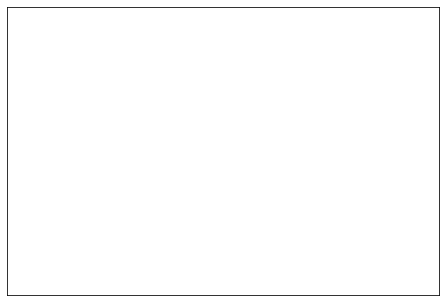

In [62]:
import networkx as nx
import pylab as plt
nx.draw(best_model_INJ, with_labels=True)
plt.show()

In [0]:
from ipywidgets import FloatProgress


In [0]:
model_INJ = BayesianNetwork(best_model_INJ.edges())
model_INJ.fit(Bayes_Train_INJ)

In [0]:
Bayes_Train_INJ.columns.difference(X_test.columns)

In [0]:
y_pred_naiINJ = model_INJ.predict(X_test)

print(metrics.classification_report(y_test['INJURE_BOOL'],y_pred_naiINJ))
print('Accuracy:',metrics.accuracy_score(y_test['INJURE_BOOL'],y_pred_naiINJ))
print(metrics.confusion_matrix(y_test['INJURE_BOOL'],y_pred_naiINJ))





In [0]:
y_pred_naiINJ.shape

In [0]:
hc_FAT = HillClimbSearch(Bayes_Train_FAT, BicScore(X))
best_model_FAT = hc_FAT.estimate()
print(best_model_FAT.edges())

In [0]:
def solution(x, y):

    num, y_step = 1, 1
    for i in range(y-1):
        num+=y_step
        y_step+=1
        
    x_step = y+1    
    for j in range(x-1):
        num+=x_step
        x_step+=1
    
    return num

In [0]:
model_FAT = BayesianModel(best_model_FAT.edges())
model_FAT.fit(Bayes_Train_FAT)

In [0]:
y_pred_naiFAT = model_FAT.predict(X_test)

print(metrics.classification_report(y_test['FATAL_BOOL'],y_pred_naiFAT))
print('Accuracy:',metrics.accuracy_score(y_test['FATAL_BOOL'],y_pred_naiFAT))
print(metrics.confusion_matrix(y_test['FATAL_BOOL'],y_pred_naiFAT))





In [0]:
y_pred_naiFAT.shape

In [0]:
hc_COST = HillClimbSearch(Bayes_Train_COST, BicScore(X))
best_model_COST = hc_COST.estimate()
print(best_model_COST.edges())

In [0]:
model_COST = BayesianModel(best_model_COST.edges())
model_COST.fit(Bayes_Train_COST)

/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,


In [0]:
y_pred_naiCOST = model_COST.predict(X_test)

print(metrics.classification_report(y_test['TOTAL_COST'],y_pred_naiCOST))
print('Accuracy:',metrics.accuracy_score(y_test['TOTAL_COST'],y_pred_naiCOST))
print(metrics.confusion_matrix(y_test['TOTAL_COST'],y_pred_naiCOST))


  0%|          | 0/319 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       0.63      0.70      0.66       179
           1       0.71      0.65      0.68       207

    accuracy                           0.67       386
   macro avg       0.67      0.68      0.67       386
weighted avg       0.68      0.67      0.67       386

Accuracy: 0.6735751295336787
[[125  54]
 [ 72 135]]


In [0]:
y_pred_naiCOST = list(y_pred_naiCOST['TOTAL_COST']) 
y_pred_naiFAT = list(y_pred_naiFAT['FATAL_BOOL'])
y_pred_naiINJ = list(y_pred_naiINJ['INJURE_BOOL'])

In [0]:
final_pred = pd.DataFrame()
final_pred['y_test_COST'] = y_test['TOTAL_COST']
final_pred['y_test_INJ'] = y_test['INJURE_BOOL']
final_pred['y_test_FAT'] = y_test['FATAL_BOOL']
final_pred.shape

(386, 3)

In [0]:
val = [y_pred_rfCOST,y_pred_rfINJ,y_pred_rfFAT,y_pred_dtCOST,y_pred_dtINJ,y_pred_dtFAT,y_pred_gbCOST,y_pred_gbINJ,y_pred_gbFAT,y_pred_naiCOST,y_pred_naiINJ,y_pred_naiFAT] 
key = ['y_pred_rfCOST','y_pred_rfINJ','y_pred_rfFAT','y_pred_dtCOST','y_pred_dtINJ','y_pred_dtFAT','y_pred_gbCOST','y_pred_gbINJ','y_pred_gbFAT','y_pred_naiCOST','y_pred_naiINJ','y_pred_naiFAT'] 
for k,v in zip(key,val):
  final_pred[k] = v


In [0]:
final_pred.shape,final_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 43 to 728
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   y_test_COST     386 non-null    int64
 1   y_test_INJ      386 non-null    int64
 2   y_test_FAT      386 non-null    int64
 3   y_pred_rfCOST   386 non-null    int64
 4   y_pred_rfINJ    386 non-null    int64
 5   y_pred_rfFAT    386 non-null    int64
 6   y_pred_dtCOST   386 non-null    int64
 7   y_pred_dtINJ    386 non-null    int64
 8   y_pred_dtFAT    386 non-null    int64
 9   y_pred_gbCOST   386 non-null    int64
 10  y_pred_gbINJ    386 non-null    int64
 11  y_pred_gbFAT    386 non-null    int64
 12  y_pred_naiCOST  386 non-null    int64
 13  y_pred_naiINJ   386 non-null    int64
 14  y_pred_naiFAT   386 non-null    int64
dtypes: int64(15)
memory usage: 48.2 KB


((386, 15), None)

In [0]:
pd.DataFrame.to_csv(final_pred,'Final_Pred.csv')

In [0]:
data = pd.read_csv(r"/content/Final_Pred.csv")

In [0]:
i,f,c = [],[],[]

for co in final_pred.columns:
  if 'INJ' in co:
    i.append(co)
  elif 'FAT' in co:
    f.append(co)
  else:
    c.append(co)
INJ_out = final_pred[i]
FAT_out = final_pred[f]
COST_out = final_pred[c]

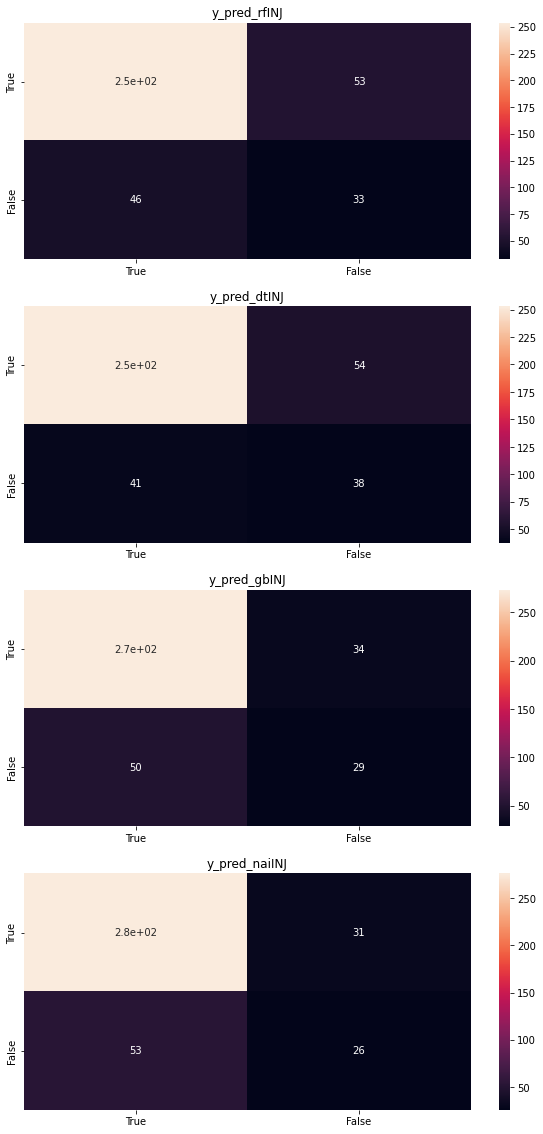

In [0]:
a=0
fig, axs = plt.subplots(4,figsize=(10,20))

for col in  INJ_out.columns:
  if 'test' not in col:
    co = metrics.confusion_matrix(INJ_out['y_test_INJ'],INJ_out[col])
    sns.heatmap(pd.DataFrame(co,index = [i for i in ['True','False']],
                      columns = [i for i in ['True','False']]),annot = True, ax=axs[a])
    axs[a].set_title(col)
    a+=1

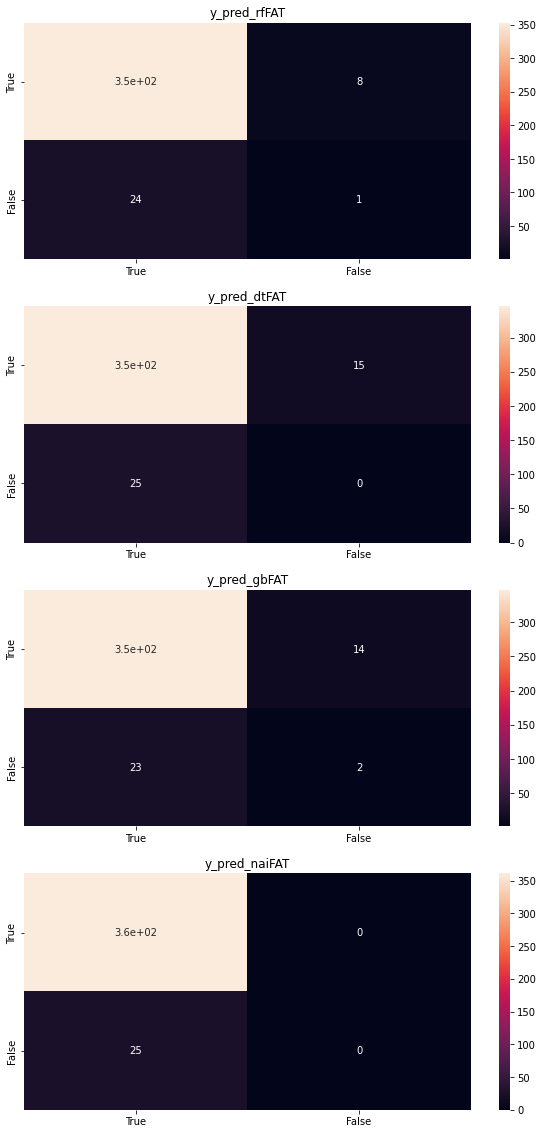

In [0]:
a=0
fig, axs = plt.subplots(4,figsize=(10,20))

for col in  FAT_out.columns:
  if 'test' not in col:
    co = metrics.confusion_matrix(FAT_out['y_test_FAT'],FAT_out[col])
    sns.heatmap(pd.DataFrame(co,index = [i for i in ['True','False']],
                      columns = [i for i in ['True','False']]),annot = True, ax=axs[a])
    axs[a].set_title(col)
    a+=1

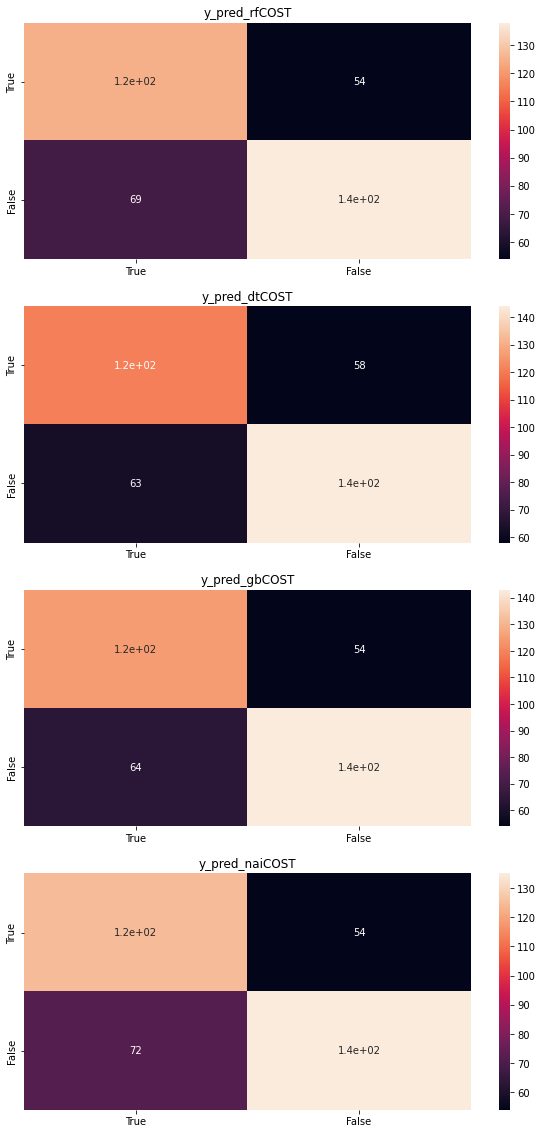

In [0]:
a=0
fig, axs = plt.subplots(4,figsize=(10,20))

for col in  COST_out.columns:
  if 'test' not in col:
    co = metrics.confusion_matrix(COST_out['y_test_COST'],COST_out[col])
    sns.heatmap(pd.DataFrame(co,index = [i for i in ['True','False']],
                      columns = [i for i in ['True','False']]),annot = True, ax=axs[a])
    axs[a].set_title(col)
    a+=1

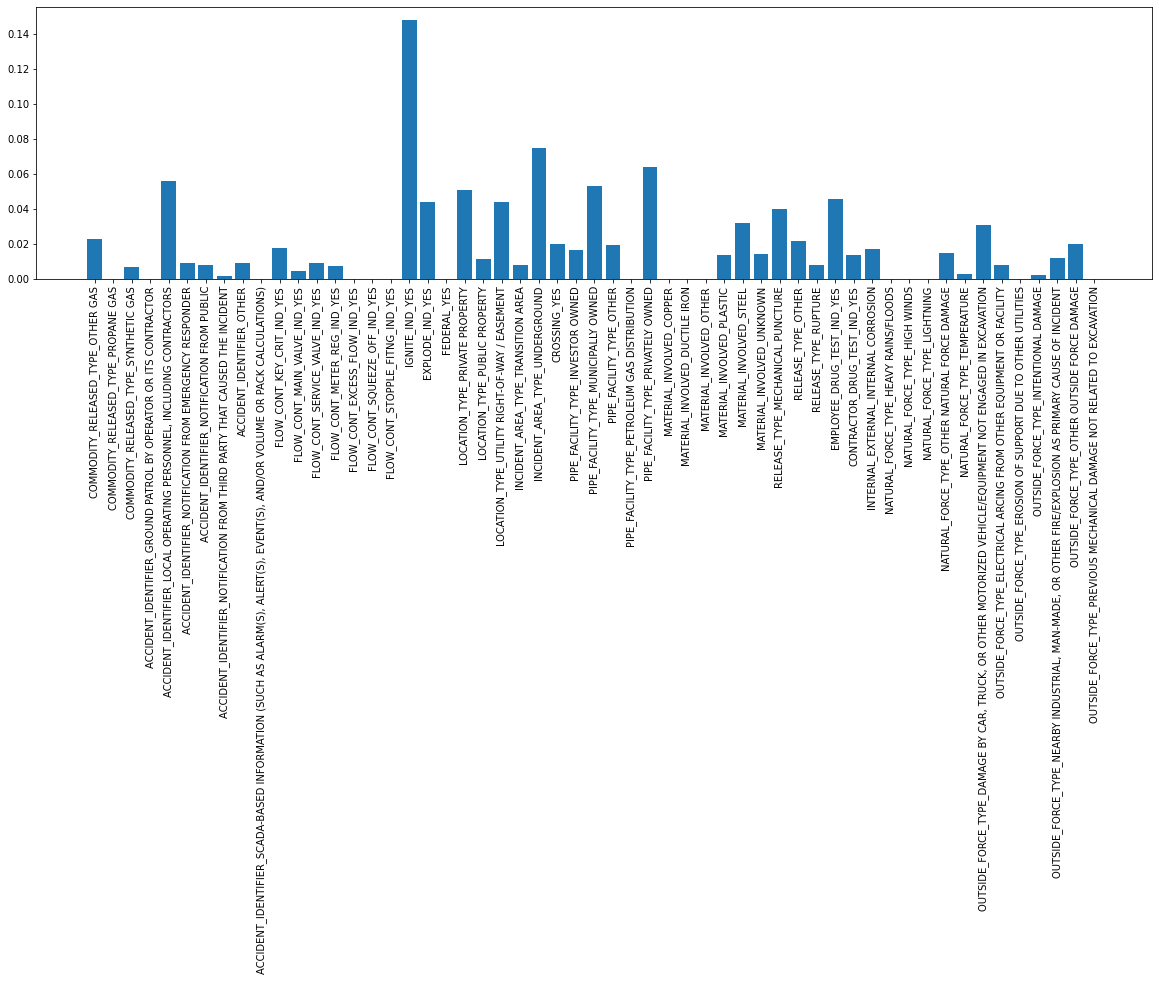

In [0]:
dt_model = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 1, min_samples_split= 4)
dt_model.fit(X_train,y_train['INJURE_BOOL'])
impor = dt_model.feature_importances_
plt.figure(figsize=(20,5))
plt.bar([x for x in X_train.columns], impor)
plt.xticks(rotation = 90)
plt.show()

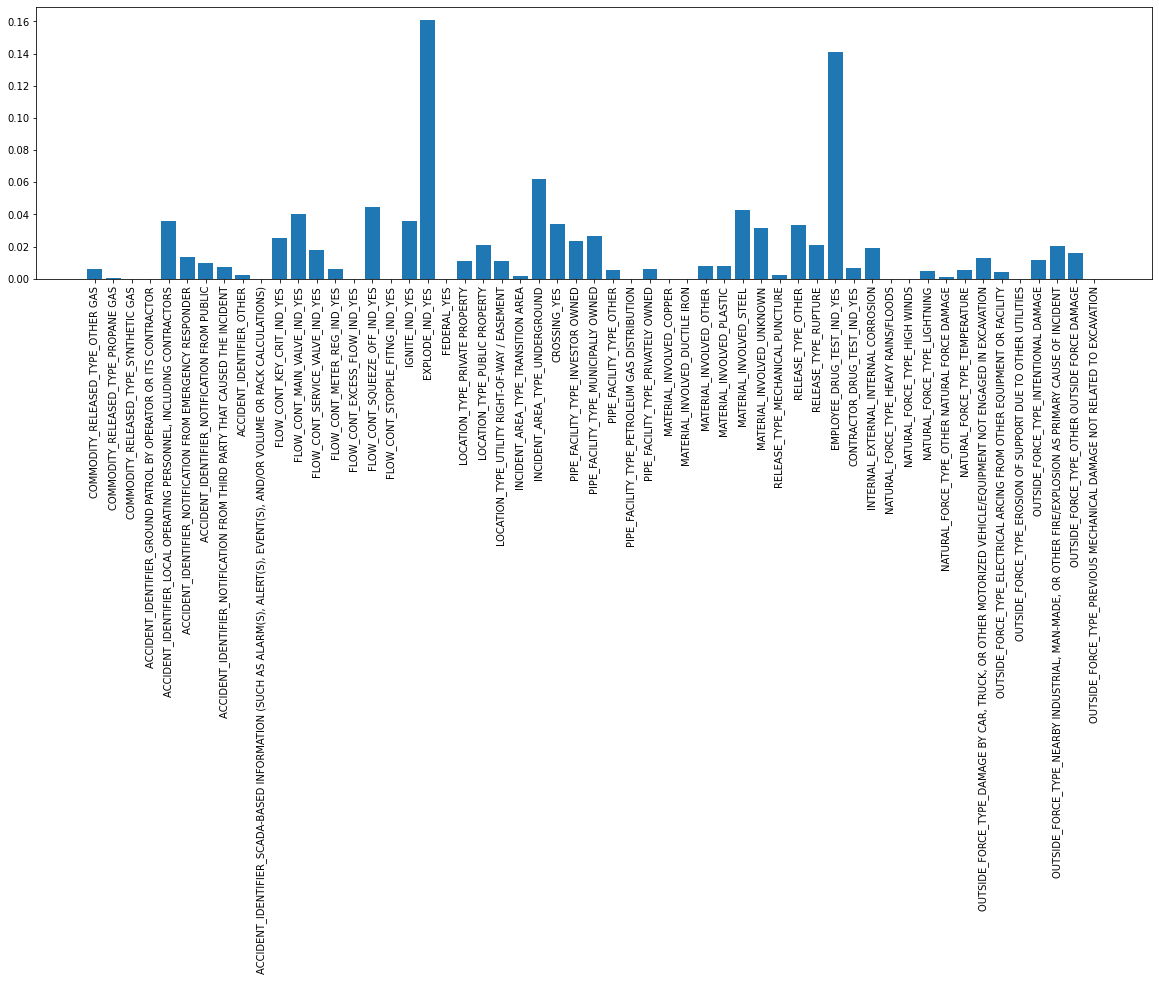

In [0]:
gb_model = GradientBoostingClassifier(learning_rate= 0.05, n_estimators= 1500)
gb_model.fit(X_train,y_train['FATAL_BOOL'])
impor = gb_model.feature_importances_
plt.figure(figsize=(20,5))
plt.bar([x for x in X_train.columns], impor)
plt.xticks(rotation = 90)
plt.show()

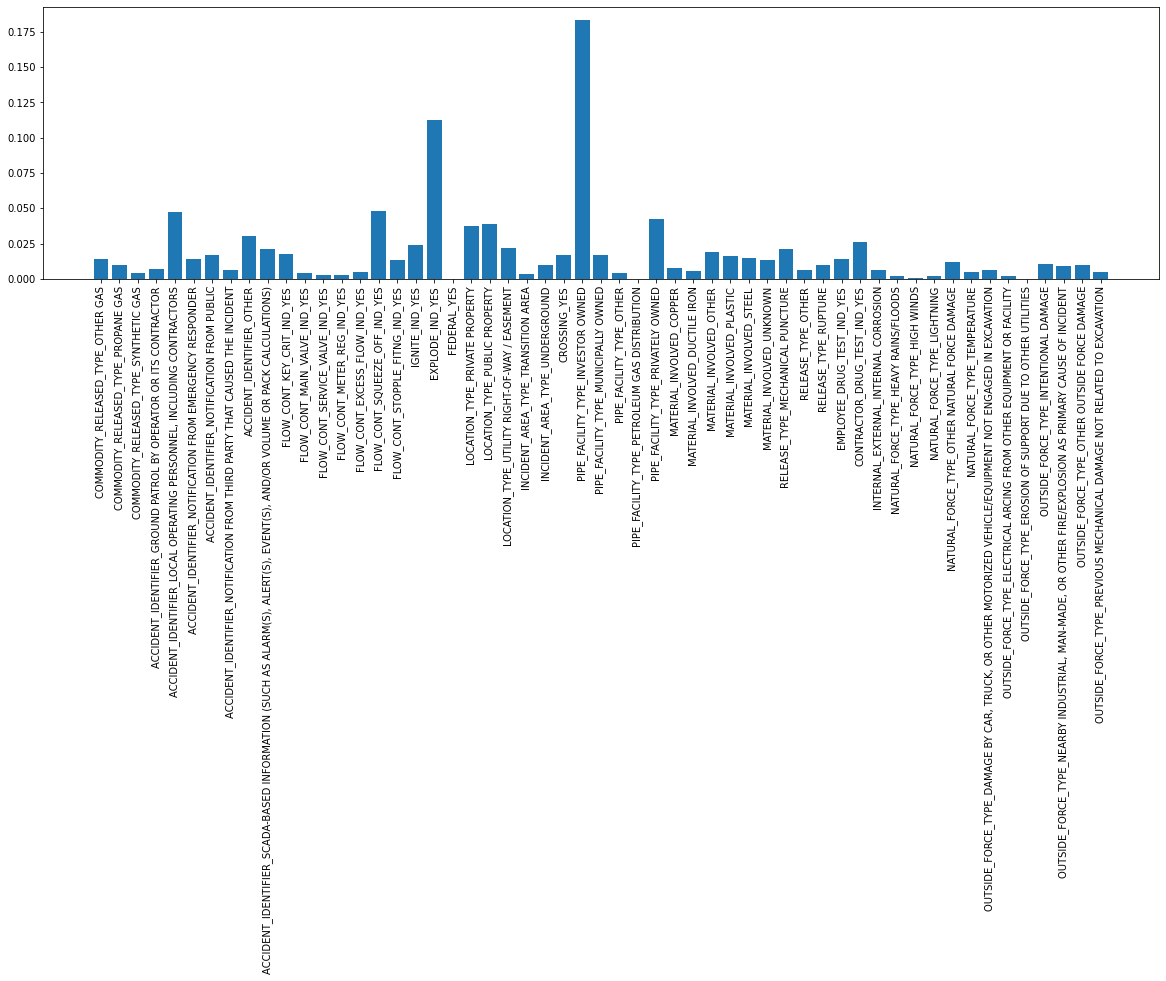

In [0]:
gb_model_2 = GradientBoostingClassifier(learning_rate= 0.05, n_estimators= 500)
gb_model_2.fit(X_train,y_train['TOTAL_COST'])
impor = gb_model_2.feature_importances_
plt.figure(figsize=(20,5))
plt.bar([x for x in X_train.columns], impor)
plt.xticks(rotation = 90)
plt.show()

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

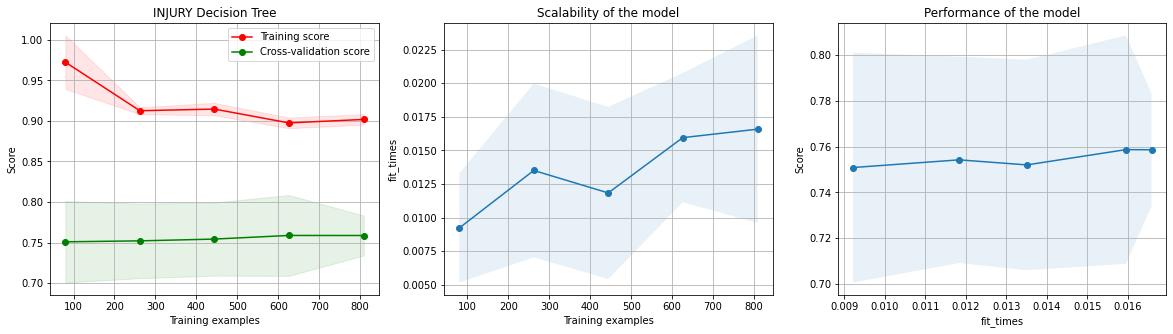

In [0]:
title = "INJURY Decision Tree"
plot_learning_curve(dt_model, title, X_train, y_train['INJURE_BOOL'], cv=10, n_jobs=4)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

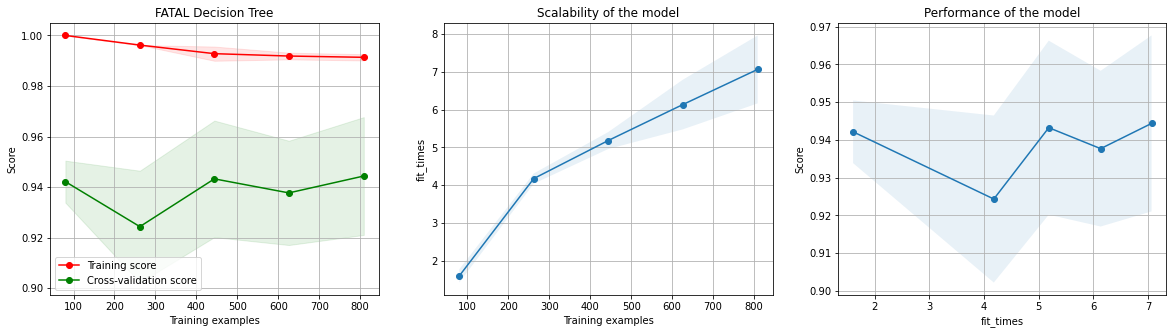

In [0]:
title = "FATAL Decision Tree"
plot_learning_curve(gb_model, title, X_train, y_train['FATAL_BOOL'], cv=10, n_jobs=4)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

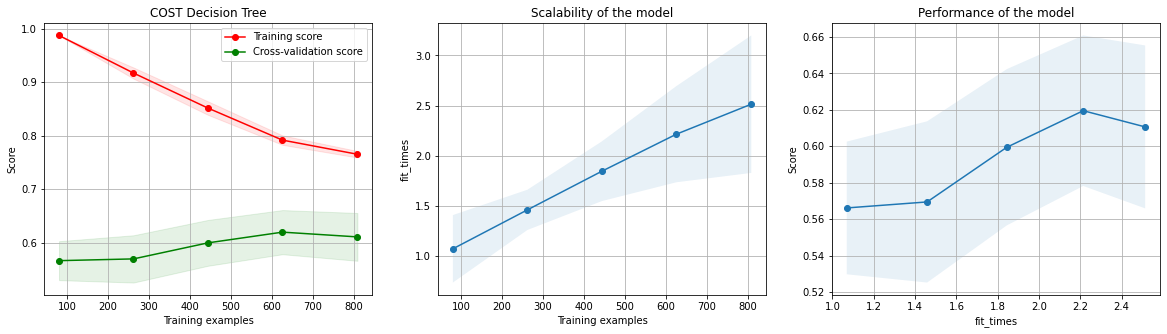

In [0]:
title = "COST Decision Tree"
plot_learning_curve(gb_model_2, title, X_train, y_train['TOTAL_COST'], cv=10, n_jobs=4)